In [3]:
# NetworkX is a powerful library for creating, analyzing, and visualizing graphs and networks.
import networkx as nx

In [53]:
# ========================================================
# 1. Find the Degree of a Vertex in an Undirected Graph
# ========================================================

# Create an Undirected Graph
G = nx.Graph() # creates an empty undirected graph object
G.add_edges_from([(1, 2), (1, 3), (3, 4), (4,2), (1,4), (1,1)]) # add nodes and edges to G

# Print graph details
print("Nodes:", G.nodes)
print("Edges:", G.edges)

# Check the degree of a vertex (e.g., node 1)
node = 1
degree = G.degree(node)

print(f"Degree of node {node}: {degree}")
##  f-strings (formatted string literals) allow you to embed variables directly into a string using curly braces {}.

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 3), (1, 4), (1, 1), (2, 4), (3, 4)]
Degree of node 1: 5


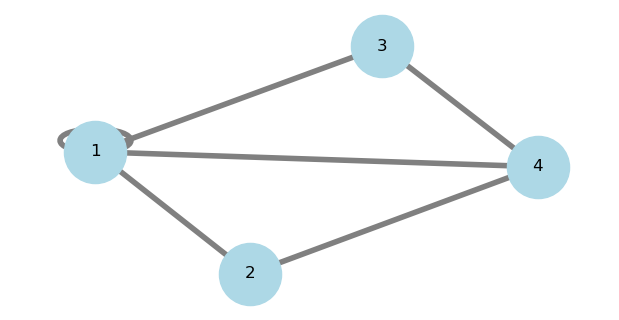

In [54]:
import matplotlib.pyplot as plt

# Fix the node positions using a random seed
pos = nx.spring_layout(G, seed=12)  # Ensures consistent layout

# Draw the graph
plt.figure(figsize=(6,3)) # Creates a rectangular 6-inch wide, 3-inch tall figure
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", 
        edge_color="gray",width=4, font_size=12)
# Add margins to prevent nodes from being cut off
plt.margins(0.1)  # Increase margins by 10%
plt.show()

In [44]:
# Find Degrees of All Nodes in a Graph

# Print degree of all nodes
print("Degrees of all nodes:")
for node, deg in G.degree():
    print(f"Node {node} → Degree: {deg}")

Degrees of all nodes:
Node 1 → Degree: 5
Node 2 → Degree: 2
Node 3 → Degree: 2
Node 4 → Degree: 3


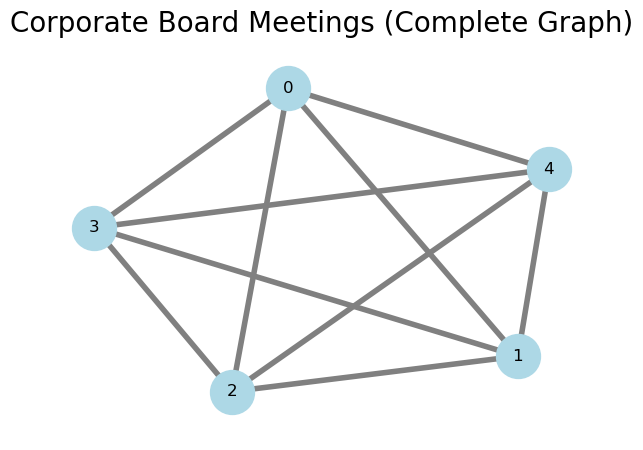

In [55]:
# ========================================================
# 2. Model a Complete Graph
# ========================================================

# Create a complete graph with 5 board members
n = 5
G = nx.complete_graph(n) #create a complete graph with n nodes

# Fix the node positions using a random seed
pos = nx.spring_layout(G, seed=42)  # Ensures consistent layout

# Draw the complete graph
plt.figure(figsize=(6,4)) # Creates a rectangular 6-inch wide, 4-inch tall figure
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", 
        edge_color="gray", width=4, font_size=12)
# Add margins to prevent nodes from being cut off
plt.margins(0.1)  # Increase margins by 10%
plt.title("Corporate Board Meetings (Complete Graph)", fontsize=20)
plt.show()


{0: 'NYC', 1: 'LAX', 2: 'CHI', 3: 'ATL', 4: 'DFW'}


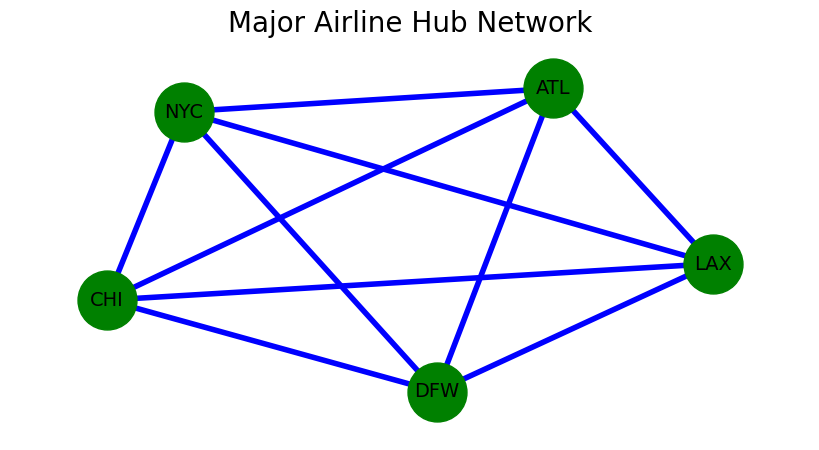

In [56]:
# Create a complete graph for airline hubs

hubs = ["NYC", "LAX", "CHI", "ATL", "DFW"]
G = nx.complete_graph(len(hubs))

# Relabel nodes with airport codes
# Renames nodes in the graph G based on the provided mapping.
# {i: hubs[i] for i in range(len(hubs))} → Creates a dictionary that maps numeric node labels (0,1,2,...) to airport codes
# Nodes originally labeled as 0,1,2,3,4 are renamed to JFK, LAX, ORD, ATL, DFW.
# G = nx.relabel_nodes(G, {i: hubs[i] for i in range(len(hubs))})

mapping = {i: hubs[i] for i in range(len(hubs))}
print(mapping)

G = nx.relabel_nodes(G,mapping)
#G = nx.relabel_nodes(G, {0: "JFK", 1:"LAX", 2:"CHI", 3:"ATL", 4:"DFW"})

# Draw the airline hub network
plt.figure(figsize=(8,4))
nx.draw(G, with_labels=True, node_size=1800, node_color="green", 
        edge_color="blue", width=4, font_size=14)
# Add margins to prevent nodes from being cut off
plt.margins(0.1)  # Increase margins by 10%
plt.title("Major Airline Hub Network", fontsize=20)
plt.show()

In [59]:
# Application of Complete Graph

# Traveling Salesperson Problem (TSP) – Logistics & Route Optimization
# A salesperson must visit n cities exactly once and return to the starting city.
# The goal is to find the shortest possible route.
# Every city is directly connected to every other city → Modeled as a complete graph Kn

import itertools
import random

# Create a complete graph with 5 nodes
G = nx.complete_graph(5)

# Set a fixed random seed for reproducibility
random.seed(42)

# Add weights to each edge
for u, v in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 20)  # Assign a random weight

# Initialize shortest path variables
shortest_path = None
shortest_distance = float("inf") 

# Compute shortest path using brute-force (not efficient for large graphs)
# itertools.permutations(G.nodes) generates all possible orderings of nodes in the graph.
# Each permutation represents one possible path.

# Get total number of paths (permutations of nodes)
total_paths = len(list(itertools.permutations(G.nodes)))
print(f"Total Paths (Visiting All Nodes in Order): {total_paths}")

for path in itertools.permutations(G.nodes):
    # Compute the Total Distance for Each Path
    distance = sum(G.edges[path[i], path[i+1]]['weight'] for i in range(len(path)-1)) 
    # Loops through each pair of consecutive nodes in the path.
    # G.edges[path[i], path[i+1]]['weight'] gets the weight (cost) of the edge.
    # The sum(...) function adds up all edge weights to get the total distance of the path.

    '''
    for i in range(len(path) - 1):
        u, v = path[i], path[i+1]  # Get consecutive nodes in the path
        weight = G.edges[u, v]['weight']  # Retrieve the edge weight
        print(f"Edge ({u}, {v}) → Weight: {weight}")
    
    print("===================================")
    '''
    
    if distance < shortest_distance:
        shortest_distance = distance
        shortest_path = path

print(f"Shortest Path: {shortest_path}")
print(f"Path Length: {shortest_distance}")


Total Paths (Visiting All Nodes in Order): 120
Shortest Path: (0, 2, 4, 1, 3)
Path Length: 13


In [60]:
# ========================================================
# 3. Finds a single cycle in an undirected graph.
# ========================================================

# Create an undirected graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])  # Cycle exists

# Find all cycles in the graph
cycles = nx.cycle_basis(G)  # Returns a list of cycles

# Use if-else to check for cycles
if cycles:
    print("Cycle Found:", cycles)
else:
    print("No Cycle Found.")

Cycle Found: [[1, 2, 4], [3, 2, 4]]


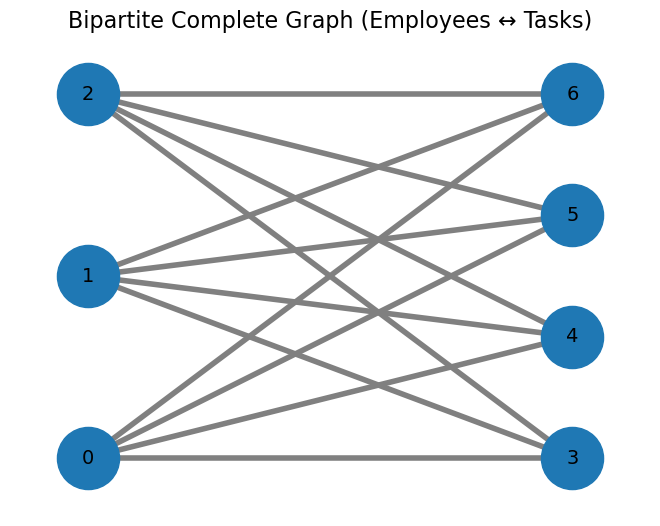

In [61]:
# ========================================================
# 4. Model a Complete Bipartite Graph
# ========================================================

## Job Assignments & Task Scheduling
## A company has m employees and n tasks.

# Create a bipartite complete graph
m, n = 3, 4  # 3 employees, 4 tasks
G = nx.complete_bipartite_graph(m, n)

# Draw the bipartite graph
pos = nx.bipartite_layout(G, range(m))  # Position nodes
nx.draw(G, pos, with_labels=True, node_size=2000, 
        edge_color="gray", width=4, font_size=14)
# Add margins to prevent nodes from being cut off
plt.margins(0.1)  # Increase margins by 10%
plt.title("Bipartite Complete Graph (Employees ↔ Tasks)", fontsize=16)
plt.show()


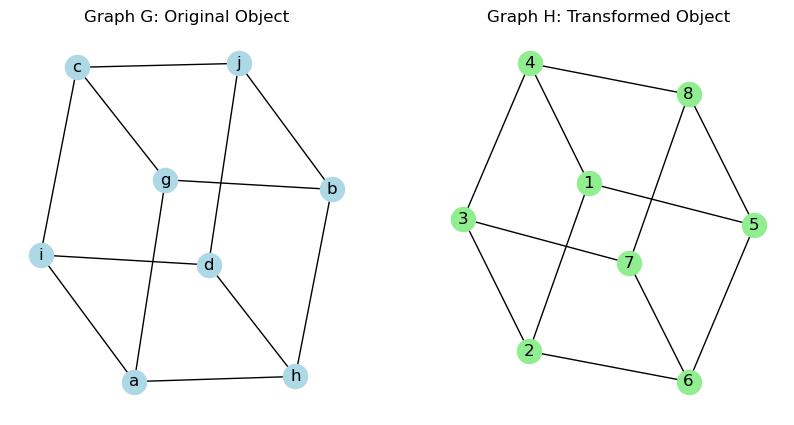

✅ The two graphs are isomorphic! (Same structure, different representation)


In [62]:
## ================================================================
## Example 5.1: Isomorphism Graphs Example from  Graph Terminology
## ================================================================

import networkx as nx
import matplotlib.pyplot as plt

# Create the first graph G (Original Object)
G = nx.Graph()
G.add_edges_from([
    ('a','g'),('a','h'),('a','i'),('b','g'),('b','h'),('b','j'),('c','g'),
    ('c','i'),('c','j'),('d','h'),('d','i'),('d','j')
])

# Create the second graph H (Transformed Object - Rotated or Scaled)
H = nx.Graph()
H.add_edges_from([
    (1,2),(1,5),(1,4),(2,6),(2,3),(5,6),(5,8),(6,7),(8,7),(8,4),(7,3),(3,4)
])

# Check if the graphs are isomorphic (i.e., structurally identical)
graph_matcher = nx.is_isomorphic(G, H)

# Visualizing both graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Draw first graph
nx.draw(G, with_labels=True, ax=axes[0], node_color="lightblue", edge_color="black")
axes[0].set_title("Graph G: Original Object")

# Draw second graph
nx.draw(H, with_labels=True, ax=axes[1], node_color="lightgreen", edge_color="black")
axes[1].set_title("Graph H: Transformed Object")

plt.show()

# Print result
if graph_matcher:
    print("✅ The two graphs are isomorphic! (Same structure, different representation)")
else:
    print("❌ The graphs are NOT isomorphic!")


In [64]:
## ================================================================
## Example 5.2: Graph-based Object Recognition
## ================================================================

## This code uses computer vision and graph theory to compare two images based on the similarity of 
## their extracted features. It applies ORB keypoint detection, constructs graphs from the keypoints, 
## and checks for graph isomorphism to determine if the two images contain the same object.

import cv2 #For image processing.
import numpy as np #For numerical operations (e.g., distance calculations).
import networkx as nx #For graph creation and comparison
import matplotlib.pyplot as plt # For visualization

## ORB (Oriented FAST and Rotated BRIEF) is used to detect keypoints (important features in the image).
# Function to detect keypoints and construct a graph
def extract_graph_from_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Use ORB (Oriented FAST and Rotated BRIEF) to detect keypoints
    orb = cv2.ORB_create()
    keypoints = orb.detect(image, None)

    # Convert keypoints to graph nodes
    G = nx.Graph()
    
    for i, keypoint in enumerate(keypoints):
        x, y = keypoint.pt  # Get keypoint coordinates
        G.add_node(i, pos=(x, y))  # Add keypoint as a node

    # Create edges between close keypoints (simulating object structure)
    keypoint_positions = np.array([kp.pt for kp in keypoints])
    for i in range(len(keypoint_positions)):
        for j in range(i + 1, len(keypoint_positions)):
            # Compute Euclidean distance between keypoints
            distance = np.linalg.norm(keypoint_positions[i] - keypoint_positions[j])
            if distance < 50:  # Add edge if keypoints are close enough
                G.add_edge(i, j)
    
    return G, keypoints, image

# Function to check if two images have isomorphic graphs
def compare_images(image1, image2):
    G1, keypoints1, img1 = extract_graph_from_image(image1)
    G2, keypoints2, img2 = extract_graph_from_image(image2)

    # Check for graph isomorphism
    isomorphic = nx.is_isomorphic(G1, G2)

    # Plot images with detected keypoints
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.drawKeypoints(img1, keypoints1, None, color=(0,255,0)))
    axes[0].set_title("Image 1: Extracted Features")

    axes[1].imshow(cv2.drawKeypoints(img2, keypoints2, None, color=(0,255,0)))
    axes[1].set_title("Image 2: Extracted Features")

    plt.show()

    # Print result
    if isomorphic:
        print("✅ The two images contain isomorphic feature graphs! (Same object detected)")
    else:
        print("❌ The images are NOT isomorphic! (Different objects or transformations)")

### This code only works for nearly identical images because graph isomorphism is too strict for 
## real-world object recognition. Even small changes (like rotation, scaling, or lighting) 
## will break the keypoint graph structure, making two images appear as different objects.

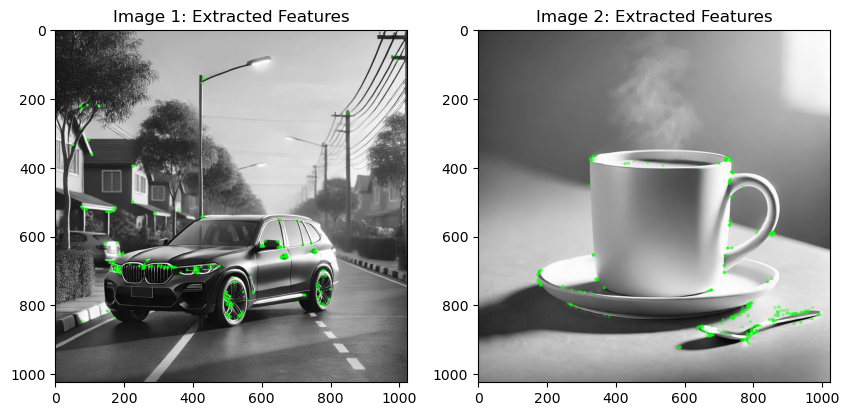

❌ The images are NOT isomorphic! (Different objects or transformations)


In [65]:
# Example: Compare two images of the same object under different transformations
compare_images("car.webp", "cup.webp")
## The small green circles shown in the image after running the ORB-based feature detection 
## represent keypoints detected by the ORB (Oriented FAST and Rotated BRIEF) algorithm.

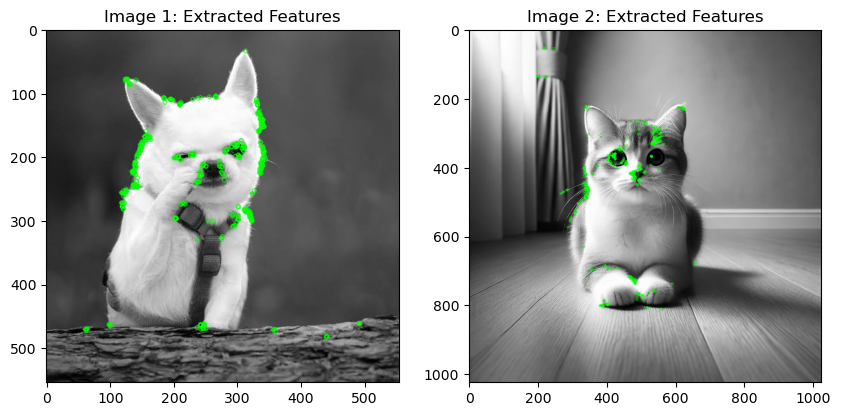

❌ The images are NOT isomorphic! (Different objects or transformations)


In [66]:
compare_images("dog.jpeg", "cat.webp")

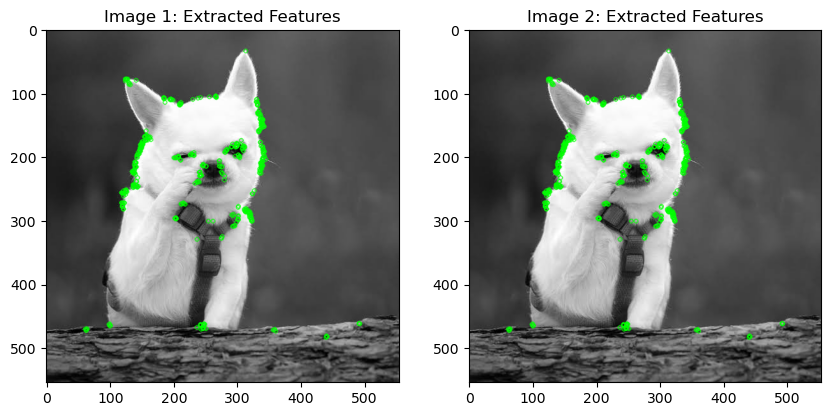

✅ The two images contain isomorphic feature graphs! (Same object detected)


In [67]:
compare_images("dog.jpeg", "dog.jpeg")

In [101]:
## Even though strict graph isomorphism is rarely used directly, 
## it is a fundamental concept in graph theory that helps build real-world algorithms. 
## Think of it like learning sorting algorithms—you may never implement bubble sort in real life, 
## but it helps you understand complex sorting techniques.
## Many real-world graph algorithms are inspired by graph isomorphism principles but use more flexible versions to make them practical.
'''
✔ Graph Matching (Pattern Recognition) → Used in AI, fraud detection, chemistry.
✔ Graph Similarity (Machine Learning + Graphs) → Used in recommendations, fraud detection.
✔ Graph Embeddings (Graph AI Models) → Used in social networks, search engines.
'''
## Example: Graph Isomorphism in Chemistry
## Exact Isomorphism: "Are these two molecules exactly the same?"
## Graph Similarity Matching: "Are these two molecules similar enough to have the same medical effect?"

## Graph isomorphism helps in understanding how to compare molecular structures, 
## which is later improved into graph similarity.

'\n✔ Graph Matching (Pattern Recognition) → Used in AI, fraud detection, chemistry.\n✔ Graph Similarity (Machine Learning + Graphs) → Used in recommendations, fraud detection.\n✔ Graph Embeddings (Graph AI Models) → Used in social networks, search engines.\n'